##  ВЫБОР ПОТЕНЦИАЛЬНО ПОПУЛЯРНОГО ИГРОВОГО ПРОДУКТА .
Краткое описание проекта.
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
Нужно выявить определяющие успешность игры закономерности,что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год исходя из данных из открытых источников до 2016г..
.

      ОПИСАНИЕ ДАННЫХ МАССИВА
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

                      СОДЕРЖАНИЕ
                      
1. Загрузка библиотек и данных датасета.
2. Обзор данных датасета.
3. Предобработка данных массива.
4. Рассчет суммарных продаж игр во всех регионах.
5. Исследовательский анализ данных.
5.1 Суммарное количество проданных игр в разные годы.
5.2 Суммарное количество проданных игр по платформам.
5.3 Распределение по годам для платформ с наибольшими суммарными продажами.
5.4 Определение потенциально прибыльных платформ
6. Исследование потенциально прибыльных платформ.
6.1 Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.
6.2 Зависимость общего числа продаж от оценок критиков и пользователей для PS4 платформы.
7. Зависимость общего числа продаж от оценок критиков и пользователей для топ-5 платформ.
7.1 Детальное рассмотрение одной платформы PS4.
7.1.1  Зависимость общего числа продаж от оценок критиков и пользователей для PS4 платформы
7.1.2  Диаграмма рассеяния для PS4 платформы.
7.1.3  Вычисление коэффициента корреляции Пирсона для PS4 платформы.
8. Зависимость общего числа продаж от оценок критиков и пользователей для топ-5 платформ.
8.1 Вычисление коэффициента корреляции Пирсона и диаграмма рассеяния для топ-5 платформ.
9. Диаграмма рассеяния и рассчет корреляции между отзывами и продажами для всех платформ.
10. Определение для топ-5 популярных платформ долей продаж для каждого региона.
11. Определение топ-5 популярных жанров для каждого региона.
12. Влияние рейтинга ESRB на продажи в отдельном регионе.
13. Статистический анализ данных.
13.1 Расчет дисперсий и стандартного отклонений.
13.2  Проверка гипотез исследования.

ОБЩИЙ ВЫВОД ДЛЯ РАССМОТРЕННОГО ИССЛЕДОВАНИЯ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy import stats as st

In [2]:
data=pd.read_csv('C:/Users/анатолий/Documents/datasets/games.csv')

2. Обзор данных датасета.

In [3]:
display(data.head())
data.info()
data.isna().sum()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

3. Предобработка данных массива.

In [4]:
data=data.rename(
    columns=str.lower
)#  названия столбцов перевели в строковый
data['platform'].nunique()

31

In [5]:
display(data.head())
data=data.dropna(subset=['name','year_of_release'])
data['year_of_release']=data['year_of_release'].astype('int')
data = data.replace('tbd', 'NaN')
data['user_score']=data['user_score'].astype('float64')
data['rating'] = data['rating'].fillna('tbd')
data.info()
data.isna().sum()
data['rating'].value_counts()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


tbd     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Предварительный анализ данных показал,что есть 2 пропуска в названии игр можем смело удалить и видим,что удалились и два 
пропуска в названии жанра.Удалили 269 пропусков в столбцу с годом релиза,так как это составляет всего лишь 1.6 процента от общего количества строк и является не значительным количеством.В столбцах с оценками игр пользователями,критиками и профессиональной рейтинговой ассоциации пропусков добрая половина - пока не трогаем чтобы не потерять много данных
и не заменяем медианами т.к. это приведет к сильным искажениям результатов.Просто ниже отфильтруем их при анализе влияния
этих показателей на исследуемые данные по жанрам и платформам.
Привели года релиза к целочисленному значению(здесь нет смысла перевода в формат времени)
Также заменили 'tdb' на пропуски в столбце с оценками пользователей .

4. Рассчет суммарных продаж игр во всех регионах.

In [6]:
# создадим столбец с этими данными.
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,tbd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,tbd,0.01


5. Исследовательский анализ данных.

5.1 Суммарное количество проданных игр в разные годы.

<AxesSubplot:title={'center':'Суммарно проданные игры в разные годы.'}, xlabel='year_of_release'>

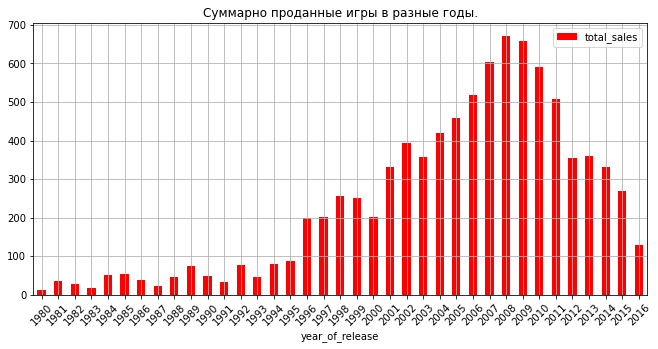

In [7]:
# суммарная продажа игр по годам
data_years_sales=data.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
data_years_sales.plot(y='total_sales',grid=True,rot=45,kind='bar',figsize=(11,5),\
                      title='Суммарно проданные игры в разные годы.',color='r')


Видим,что индустрия производства игр начала показывать растущие результаты после 1995 года и достигла максимальных продаж к 2008 году после чего начался спад скорее всего связанный с мировым финансовым кризисом тех лет.

In [8]:
# продажа игр по по странам и годам
data_years_region = data[[x for x in data.columns if 'sales' in x] + ['year_of_release']]

display(data_years_region)

,na_sales,eu_sales,jp_sales,other_sales,total_sales,year_of_release
0,41.36,28.96,3.77,8.45,82.54,2006
1,29.08,3.58,6.81,0.77,40.24,1985
2,15.68,12.76,3.79,3.29,35.52,2008
3,15.61,10.93,3.28,2.95,32.77,2009
4,11.27,8.89,10.22,1.00,31.38,1996
...,...,...,...,...,...,...
16710,0.00,0.00,0.01,0.00,0.01,2016
16711,0.00,0.01,0.00,0.00,0.01,2006
16712,0.00,0.00,0.01,0.00,0.01,2016
16713,0.01,0.00,0.00,0.00,0.01,2003


Сделана таблица с данными объемов продаж игр по годам и регионам,которые будем использовать далее.

5.2 Суммарное количество проданных игр по платформам.

<AxesSubplot:title={'center':'Суммарно проданные игры по платформам.'}, xlabel='platform'>

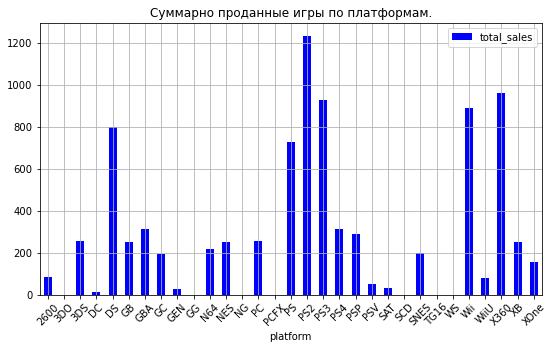

In [9]:
data_platform_sales=data.pivot_table(index='platform',values='total_sales',aggfunc='sum')
data_platform_sales.plot(y='total_sales',kind='bar',figsize=(9,5),grid=True,\
                rot=45,title='Суммарно проданные игры по платформам.',color='b')

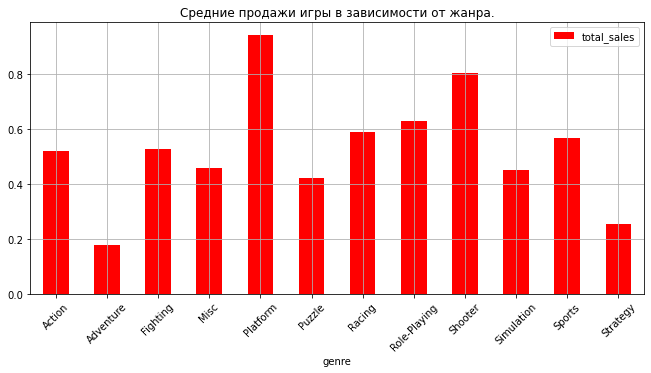

In [10]:
# средняя продажа игр по жанрам
data_genre_sales=data.pivot_table(index='genre',values='total_sales',aggfunc='mean')
data_genre_sales.plot(y='total_sales',grid=True,rot=45,kind='bar',figsize=(11,5),\
                      title='Средние продажи игры в зависимости от жанра.',color='r');

Видим,что лидерами среднего количества продаж в жанрах на первом месте это жанр Platform,второе и третье места делят Shooter и
Role-Playing соответственно.

Видим шесть лидеров по продажам.Но важно посмотреть нет ли среди не лидеров растущих платформ пока еще с маленькими объемами продаж игр. Далее рассмотрим все это детальнее.

5.3 Распределение по годам для платформ с наибольшими суммарными продажами.

<AxesSubplot:title={'center':'Продажи игр по годам для разных платформ.'}, xlabel='year_of_release'>

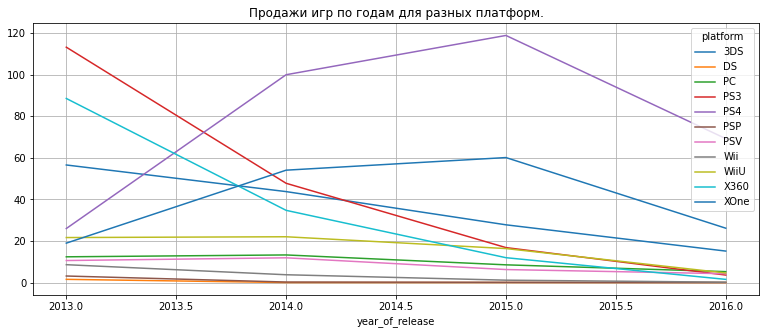

In [11]:
# распределение по годам платформ с продажами после 2012 года

data.query('year_of_release >2012').pivot_table(index='year_of_release',\
                                                    columns='platform',\
                                                    values='total_sales',\
                                                   aggfunc='sum').fillna(0).plot(grid=True,legend='best',\
            title='Продажи игр по годам для разных платформ.',figsize=(13,5))



Видим несколько платформ достигших максимума за 3-5 лет до наступления 2017 года - их и исследуем. Жизненный цикл платформ (от чего начали расти к тому и пришли) это 7-11 лет и максимум их успеха в продажах находится от 3 до 5 лет перед тем,как совсем перестать дышать. Платформ с растущими объёмами продаж не обнаружили.

Так этот график и помогает выявить актуальный период и посмотреть нет ли потенциально уже растущих платформ пусть еще и с маленькими объемами продаж, но с возможностью выхода на существенные продажи к 2017 году.И таких платформ мы не увидели, а выбрали потенциально успешные для последующего анализа,которые и будут представлены ниже в проекте.Актуальный период,согласитесь,ну это хотя бы за 1,5 - 2 года до выхода в продажах на максимум,что я и определил с вероятной гарантией 
достаточного объема продаж еще и в 2017 году.

5.4 Определение потенциально прибыльных платформ

<AxesSubplot:title={'center':'Сумма проданных игр для потенциально прибыльных платформ'}, xlabel='platform'>

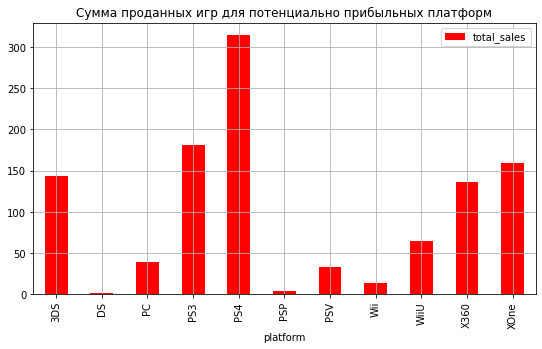

In [12]:
data[data['year_of_release'] >= 2013].pivot_table(index='platform',values='total_sales',aggfunc='sum').plot(y='total_sales',\
        kind='bar',grid=True,color='red',title='Сумма проданных игр для потенциально прибыльных платформ',figsize=(9,5))

Рассмотрим выбранные платформы более детально

Text(0.5, 1.0, 'Продажи для платформы 3DS')

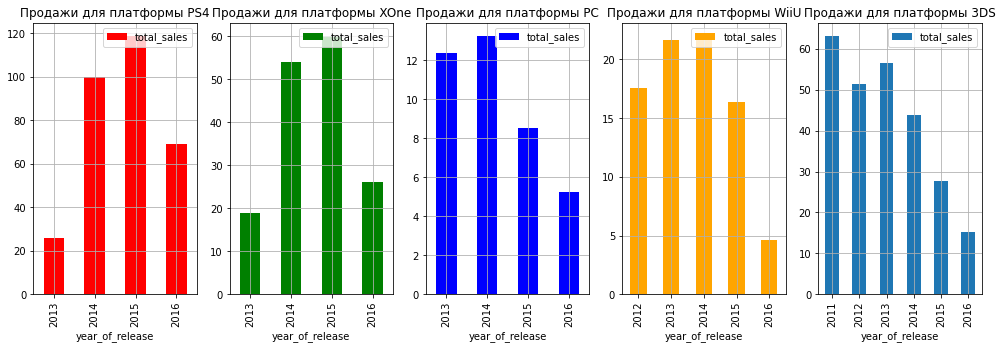

In [13]:
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(17,5))
data[data['platform'] == 'PS4'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot(y='total_sales',\
                        grid=True,color='r',kind='bar',ax=ax1,subplots=True)
ax1.set_title('Продажи для платформы PS4')

data[data['platform'] == 'XOne'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot(y='total_sales',\
                        grid=True,color='g',kind='bar',ax=ax2,subplots=True)
ax2.set_title('Продажи для платформы XOne')

data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013)].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')\
    .plot(y='total_sales',\
                        grid=True,color='b',kind='bar',ax=ax3,subplots=True)
ax3.set_title('Продажи для платформы PC')

data[data['platform'] == 'WiiU'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot(y='total_sales',\
                        grid=True,color='orange',kind='bar',ax=ax4,subplots=True)
ax4.set_title('Продажи для платформы WiiU')

data[data['platform'] == '3DS'].pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot(y='total_sales',\
                        grid=True,kind='bar',ax=ax5,subplots=True)
ax5.set_title('Продажи для платформы 3DS')

После анализа данных выбрали 5 перспективных платформы:'PS4', 'XOne', 'PC', 'WiiU', '3DS' с значимыми объемами продаж.

6.Исследование потенциально прибыльных платформ.

6.1. Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

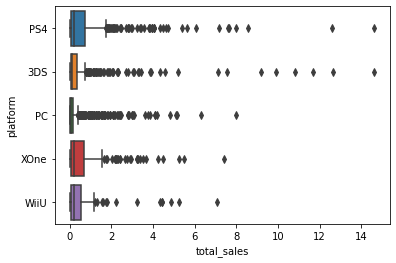

In [14]:
top_platform=['PS4','XOne','PC','WiiU','3DS']
sns.boxplot(y='platform',x='total_sales',data=data[data['platform'].isin(top_platform)],\
            orient='h');

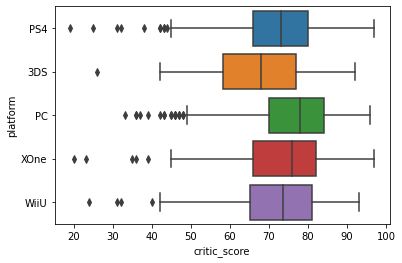

In [15]:
#рассмотрим отзывы критиков 

sns.boxplot(y="platform", x="critic_score", data=data[data['platform'].isin(top_platform)],\
            orient="h");


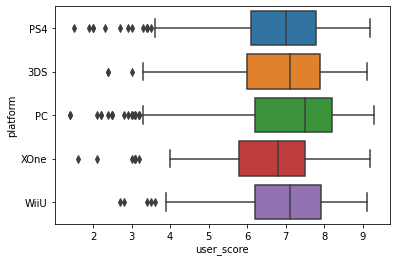

In [16]:
sns.boxplot(y="platform", x="user_score", data=data[data['platform'].isin(top_platform)],orient="h");

Эти ящики хорошо демонстрируют распределения значений медиан относительно среднего,смещения распределений вправо или влево, выпадающих значений за пределы доверительного интервала для топ-5 платформ для значений общих продаж,оценок пользователей и критиков

7.1 Детальное рассмотрение одной платформы PS4.

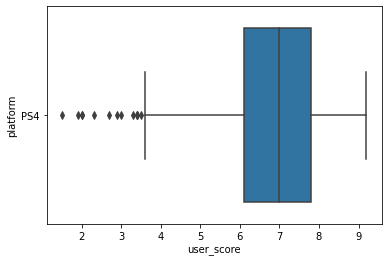

In [17]:
sns.boxplot(y="platform", x="user_score", data=data[data['platform'] == 'PS4'], orient="h");

7.1.1 Зависимость общего числа продаж от оценок критиков и пользователей для PS4 платформы

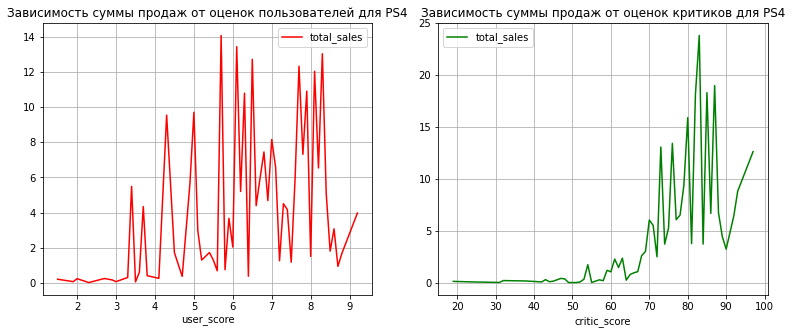

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_ps_user=data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2013)].pivot_table(index='user_score',\
                                                                            values='total_sales',aggfunc='sum')
data_ps_user.plot(grid=True,ax=ax1,subplots=True,color='red')
ax1.set_title('Зависимость суммы продаж от оценок пользователей для PS4')
data_ps_critic=data[data['platform'] == 'PS4'].pivot_table(index='critic_score',values='total_sales',aggfunc='sum')
data_ps_critic.plot(grid=True,ax=ax2,subplots=True,color='g');
ax2.set_title('Зависимость суммы продаж от оценок критиков для PS4');

7.1.2 Диаграмма рассеяния для PS4 платформы.

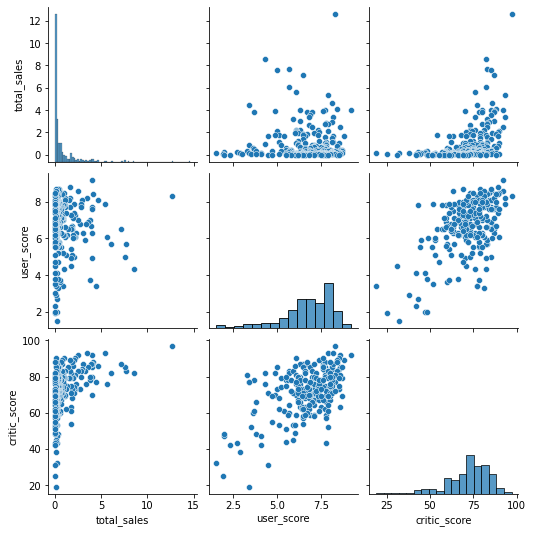

In [19]:
ps_corr=data[(data['platform'] == 'PS4') & (data['year_of_release'] >= 2013)]\
                 [['total_sales','user_score','critic_score']]
sns_plot = sns.pairplot(ps_corr[['total_sales','user_score','critic_score']])

7.1.3 Вычисление коэффициента корреляции Пирсона для PS4 платформы

In [20]:
print('Коэффициент корреляции для пары "общие продажи/оценка пользователей" для платформы PS4:',ps_corr['user_score'].\
        corr(ps_corr['total_sales']))
print('Коэффициент корреляции для пары "общие продажи/оценка критиков" для платформы PS4:',ps_corr['critic_score'].\
      corr(ps_corr['total_sales']))

Коэффициент корреляции для пары "общие продажи/оценка пользователей" для платформы PS4: -0.03195711020455646
Коэффициент корреляции для пары "общие продажи/оценка критиков" для платформы PS4: 0.40656790206178145


Рассмотрев результаты по платформе PS4 видим, что медианное значение оценок пользователей лежит в районе 7 баллов. Ну а в зависимости суммы продаж игр от оценок пользователей сложно уловить тенденции, да и коэффициент корреляции Пирсона отрицательный.Именно здесь игроки не обращали внимание на отзывы коллег по увлечению. Совсем другая тенденция для оценок критиков - хорошо просматривается зависимость прожаж от значения оценок.Явный рост зависимости вплоть до 83 баллов с последующим снижением - похоже игроки интуитивно верят оценкам на 10-15% меньше максимальной. Хотя мне сложно здесь проводить анализ,т.к. я вообще не играл в игры.

8. Зависимость общего числа продаж от оценок критиков и пользователей для топ-5 платформ.

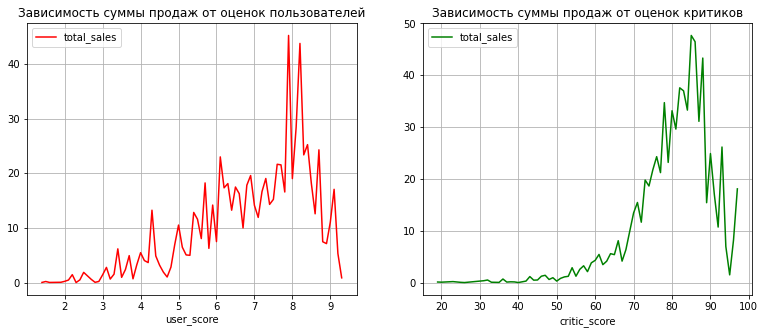

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_platform_us=data[data['platform'].isin(top_platform)].pivot_table(index='user_score',values='total_sales',aggfunc='sum')
data_platform_us.plot(grid=True,ax=ax1,subplots=True,color='red');
ax1.set_title('Зависимость суммы продаж от оценок пользователей');
data_platform_cr=data[data['platform'].isin(top_platform)].pivot_table(index='critic_score',values='total_sales',aggfunc='sum')
data_platform_cr.plot(grid=True,ax=ax2,subplots=True,color='g');
ax2.set_title('Зависимость суммы продаж от оценок критиков');

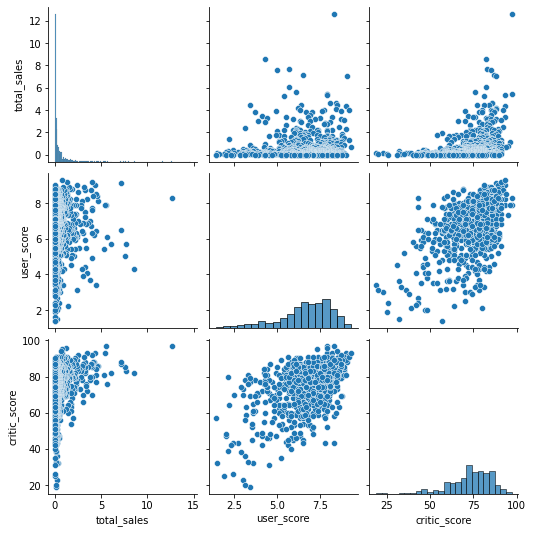

In [22]:
columns_corr=data[(data['platform'].isin(top_platform)) & (data['year_of_release'] >= 2013)]\
                 [['total_sales','user_score','critic_score']]
sns_plot = sns.pairplot(columns_corr[['total_sales','user_score','critic_score']])

In [23]:
#Вычисление коэффициента корреляции Пирсона для топ-5 платформ.
print('Коэффициент корреляции для пары "общие продажи/оценка пользователей" топ-5:',columns_corr['user_score'].\
        corr(columns_corr['total_sales']))
print('Коэффициент корреляции для пары "общие продажи/оценка критиков" топ-5:',columns_corr['critic_score'].\
      corr(columns_corr['total_sales']))

Коэффициент корреляции для пары "общие продажи/оценка пользователей" топ-5: 0.04199896323915096
Коэффициент корреляции для пары "общие продажи/оценка критиков" топ-5: 0.3335753710761145


Для топ-5 платформ среднее число продаж от оценок критиков и пользователей имеет явную зависимость достигая максимальных значений при 8 баллах для оценок пользователей и 85 баллов для оценок критиков.Похоже что для этих платформ интегрально игрокам важны мнения их коллег и критиков.

9. Диаграмма рассеяния и рассчет корреляцию между отзывами и продажами для всех платформ

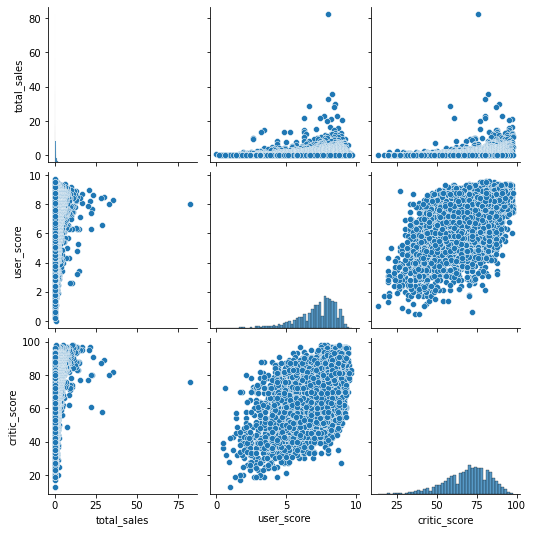

In [24]:
columns_corr=['total_sales','user_score','critic_score']
sns_plot = sns.pairplot(data[columns_corr])

In [25]:
#Вычисление коэффициента корреляции Пирсона для всех годов
print('Коэффициент корреляции для пары "общие продажи/оценка пользователей":',data['user_score'].corr(data['total_sales']))
print('Коэффициент корреляции для пары "общие продажи/оценка критиков":',data['critic_score'].corr(data['total_sales']))

Коэффициент корреляции для пары "общие продажи/оценка пользователей": 0.08798399271321644
Коэффициент корреляции для пары "общие продажи/оценка критиков": 0.24534884547411392


Сравнивая эти зависимости для всех годов и всех платформ с результатами по топ-5 платформам за последние 3 года видим что оценка пользователей более значима для продаж.

10.  Определение для топ-5 популярных платформ долей продаж для каждого региона.

Text(0, 0.5, '')

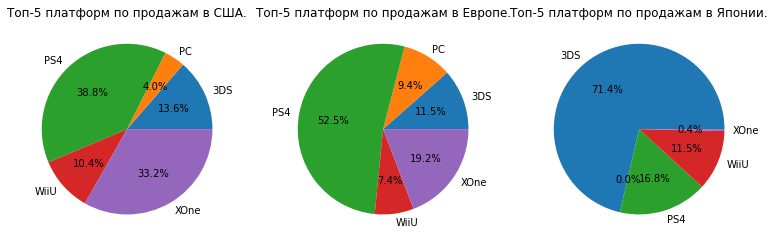

In [26]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

data_sales_top_na=data[(data['platform'].isin(top_platform)) & (data['year_of_release'] >= 2013)].groupby('platform')['na_sales'].\
    sum()
data_sales_top_na.plot(kind='pie',ax=ax1,subplots=True,autopct='%.1f%%')
ax1.set_title('Топ-5 платформ по продажам в США.')
ax1.set_ylabel('')
data_sales_top_eu=data[(data['platform'].isin(top_platform)) & (data['year_of_release'] >= 2013)].groupby('platform')['eu_sales'].\
    sum()
data_sales_top_eu.plot(kind='pie',ax=ax2,subplots=True,autopct='%.1f%%')
ax2.set_title('Топ-5 платформ по продажам в Европе.')
ax2.set_ylabel('')
data_sales_top_jp=data[(data['platform'].isin(top_platform)) & (data['year_of_release'] >= 2013)].groupby('platform')['jp_sales'].\
    sum()
data_sales_top_jp.plot(kind='pie',ax=ax3,subplots=True,autopct='%.1f%%')
ax3.set_title('Топ-5 платформ по продажам в Японии.')
ax3.set_ylabel('')

Итак,рассмотрев объемы продаж по платформам видим,что в США и Европе лидерами продаж являются платформы PS4 и XOne.В Японии же для платформы PS4 приходится всего лишь 17% рынка продаж,а безусловным лидером является платформа 3DS,которая в США и Европе находится в диапазоне 11-13%.Далее посмотрим жанры и попробуем объяснить причину такого результата.

11.  Определение топ-5 популярных жанров для каждого региона.

Text(0, 0.5, '')

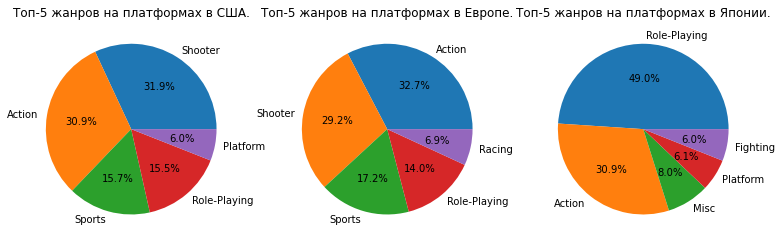

In [27]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
data_genre_na_top=data[(data['platform'].isin(top_platform)) & (data['year_of_release'] >= 2013)]\
  .groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
data_genre_na_top.plot(kind='pie',ax=ax1,subplots=True,autopct='%.1f%%')
ax1.set_title('Топ-5 жанров на платформах в США.')
ax1.set_ylabel('')
data_genre_eu_top=data[(data['platform'].isin(top_platform)) & (data['year_of_release'] >= 2013)]\
  .groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
data_genre_eu_top.plot(kind='pie',ax=ax2,subplots=True,autopct='%.1f%%')
ax2.set_title('Топ-5 жанров на платформах в Европе.')
ax2.set_ylabel('')
data_genre_jp_top=data[(data['platform'].isin(top_platform)) & (data['year_of_release'] >= 2013)]\
  .groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
data_genre_jp_top.plot(kind='pie',ax=ax3,subplots=True,autopct='%.1f%%')
ax3.set_title('Топ-5 жанров на платформах в Японии.')
ax3.set_ylabel('')

По жанрам видим очевидное лидерство Shooter и Action в США и Европе,причем с практически одинаковым лидерством.В Японии же Action достаточно популярен, ну а лидером является жанр Role-Playing.Я в игры не играл вообще,но такую закономерность может быть можно объяснить психологическими и национальными особенностями игроков в разных странах.

12.  Влияние рейтинга ESRB на продажи в отдельном регионе

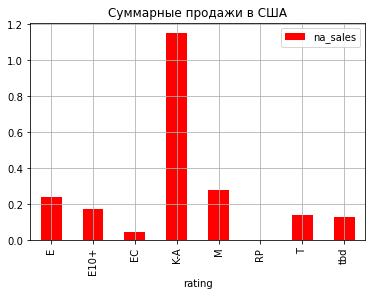

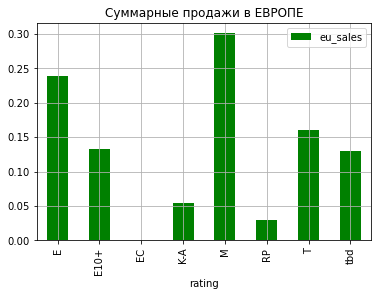

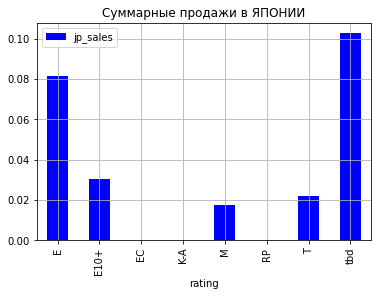

In [28]:
data_rating_us=data[data['platform'].isin(top_platform)].pivot_table(index='rating',values='na_sales',aggfunc=np.mean)
data_rating_us.plot(grid=True,kind='bar',title='Суммарные продажи в США',color='r')
plt.show()
data_rating_eu=data[data['platform'].isin(top_platform)].pivot_table(index='rating',values='eu_sales',aggfunc=np.mean)
data_rating_eu.plot(grid=True,kind='bar',title='Суммарные продажи в ЕВРОПЕ',color='g')
plt.show()
data_rating_jp=data[data['platform'].isin(top_platform)].pivot_table(index='rating',values='jp_sales',aggfunc=np.mean)
data_rating_jp.plot(grid=True,kind='bar',title='Суммарные продажи в ЯПОНИИ',color='b')
plt.show()

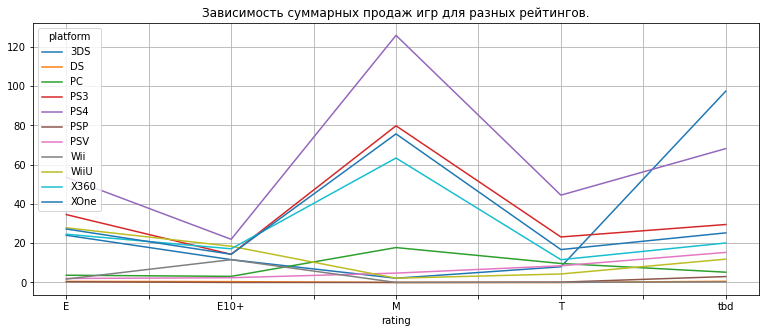

In [29]:
data.query('year_of_release >2012').pivot_table(index='rating',\
                                                    columns='platform',\
                                                    values='total_sales',\
                                                   aggfunc='sum').fillna(0).plot(grid=True,legend='best',\
            title='Зависимость суммарных продаж игр для разных рейтингов.',figsize=(13,5));


Про рейтинги можно сказать следующее: В США больше всего продаж с присвоенным рейтингом К-А т.е. переходным от детей к подросткам В Европе лидирует рейтинг М - для взрослых В Японии лидирует в продажах рейтинг для всех - Е. Ну а в общих продажах с 2013 года лидирует рейтинг М -для взрослых.

Да по регионам есть различие например в Японии таких продаж больше всего,а в США наоборот меньше.
Но, согласитесь что эти рейтинги ассоциации,вообще говоря, не являются фактором,который влияет на продажи.
Допустим я покупаю игру ребенку (я специально пришел уже купить игру ребенку) и мне главное чтобы игра не была ХХХ вот тут я и смотрю на рейтинг ассоциации чтоб не травмировать ребенка после не для того возраста купленной игрой.
Поэтому уж если рейтинг еще не присвоен а продажи как в Японии лидируют то это значит лишь что покупались игры именно те за которыми и пришли,чтоб их купить и совсем не потому что отсутствие рейтинга влияет на объемы продаж.

13.   Статистический анализ данных

Выбирем две  платформы-PC, XOne и два популярных жанра Sports , Action

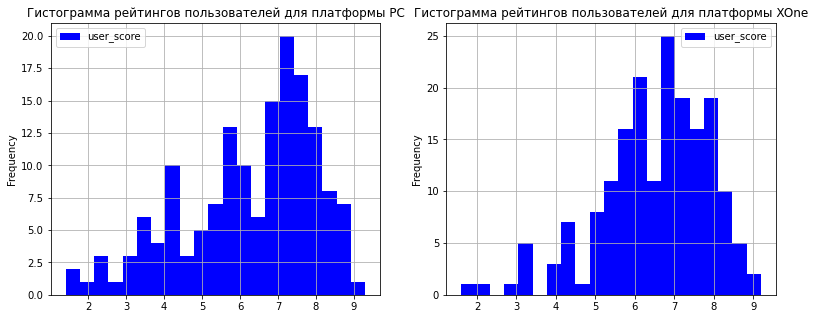

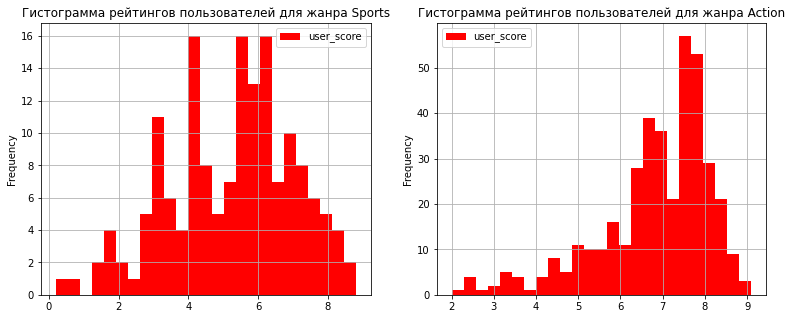

In [30]:
# построим гистограммы для пользовательских рейтингов по платформам
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013)]['user_score'].plot(kind='hist',bins=21,\
                grid=True,ax=ax1,subplots=True,color='b',legend=True)
ax1.set_title('Гистограмма рейтингов пользователей для платформы PC')
data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2013)]['user_score'].plot(kind='hist',bins=21,\
            grid=True,color='b',ax=ax2,subplots=True,legend=True)
ax2.set_title('Гистограмма рейтингов пользователей для платформы XOne')

# построим гистограммы для пользовательских рейтингов по жанрам
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

data[(data['genre'] == 'Sports') & (data['year_of_release'] >= 2013)]['user_score'].plot(kind='hist',bins=25,\
                grid=True,color='r',ax=ax1,subplots=True,legend=True)
ax1.set_title('Гистограмма рейтингов пользователей для жанра Sports')
data[(data['genre'] == 'Action') & (data['year_of_release'] >= 2013)]['user_score'].plot(kind='hist',bins=25,\
                grid=True,color='r',ax=ax2,subplots=True,legend=True);
ax2.set_title('Гистограмма рейтингов пользователей для жанра Action');

Присмотревшись к формам гистограм заметно их смещение влево,что означает превышение медианных значений над средними. Форма like-нормальное распределение и далее проведем расчеты дисперсий и стандартных отклонений для анализа гипотез по платформам PC и XOne.

13.1 Расчет дисперсии и стандартного отклонений

In [31]:
print('Среднее значение рейтинга пользователей для платформы PC: {:.2f},'.format(
        data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013)]['user_score'].mean()),
 '\nдисперсия: {:.2f}'.format(
    np.var(data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013)]['user_score'], ddof=1)),
 '\nстандартное отклонение: {:.2f}'.format(
    np.std(data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013)]['user_score'], ddof=1)))
print()
print('Среднее значение рейтинга пользователей для платформы XOne: {:.2f},'.format(
        data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2013)]['user_score'].mean()),
 '\nдисперсия: {:.2f}'.format(
    np.var(data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2013)]['user_score'], ddof=1)),
 '\nстандартное отклонение: {:.2f}'.format(
    np.std(data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2013)]['user_score'], ddof=1)))

Среднее значение рейтинга пользователей для платформы PC: 6.27, 
дисперсия: 3.04 
стандартное отклонение: 1.74

Среднее значение рейтинга пользователей для платформы XOne: 6.52, 
дисперсия: 1.91 
стандартное отклонение: 1.38


In [32]:
print('Среднее значение рейтинга пользователей для жанра Sports: {:.2f},'.format(
        data[(data['genre'] == 'Sports') & (data['year_of_release'] >= 2013)]['user_score'].mean()),
 '\nдисперсия: {:.2f}'.format(
    np.var(data[(data['genre'] == 'Sports') & (data['year_of_release'] >= 2013)]['user_score'])),
 '\nстандартное отклонение: {:.2f}'.format(
    np.std(data[(data['genre'] == 'Sports') & (data['year_of_release'] >= 2013)]['user_score'])))
print()
print('Среднее значение рейтинга пользователей для жанра Action: {:.2f},'.format(
        data[(data['genre'] == 'Action') & (data['year_of_release'] >= 2013)]['user_score'].mean()),
 '\nдисперсия: {:.2f}'.format(
    np.var(data[(data['genre'] == 'Action') & (data['year_of_release'] >= 2013)]['user_score'])),
 '\nстандартное отклонение: {:.2f}'.format(
    np.std(data[(data['genre'] == 'Action') & (data['year_of_release'] >= 2013)]['user_score'])))

Среднее значение рейтинга пользователей для жанра Sports: 5.24, 
дисперсия: 3.16 
стандартное отклонение: 1.78

Среднее значение рейтинга пользователей для жанра Action: 6.84, 
дисперсия: 1.76 
стандартное отклонение: 1.33


Итак для платформ средние значения рейтингов отличаются на 3,8% и дисперсии на 37% (значимо и учтем этот факт при использовании T-теста. Для жанров средние значения отличаются на 23% а дисперсии 43% - будем использовать параметр equal_var=False в проведении тестов.

13.2 Проверка гипотез исследования.

Нулевая гипотеза для рейтинга платформ: Средние рейтинги пользователей для платформ XOne и PC одинаковые. Альтернативная гипотеза: Средние рейтинги пользователей для платформ XOne и PC отличаются.

In [33]:
hypothesis_1 = st.ttest_ind(data[(data['platform'] == 'PC') & (data['year_of_release'] >= 2013)]['user_score'].dropna(),
             data[(data['platform'] == 'XOne') & (data['year_of_release'] >= 2013)]['user_score'].dropna(),
            equal_var=False)
alpha=0.05
print('p-value гипотезы 1:', hypothesis_1.pvalue, '\nкритерий значимости:', alpha)
if hypothesis_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value гипотезы 1: 0.14759594013430463 
критерий значимости: 0.05
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза для жанров Sports и Action: Средние рейтинги пользователей для жанров Sports и Action одинаковые. Альтернативная гипотеза: Средние рейтинги пользователей для жанров Sports и Action отличаются.

In [34]:
hypothesis_2 = st.ttest_ind(data[(data['genre'] == 'Sports') & (data['year_of_release'] >= 2013)]['user_score'].dropna(),
             data[(data['genre'] == 'Action') & (data['year_of_release'] >= 2013)]['user_score'].dropna(),
            equal_var=False)
alpha=0.05
print('p-value гипотезы 2: ', hypothesis_2.pvalue, '\nкритерий значимости:', alpha)
if hypothesis_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value гипотезы 2:  1.4460039700704315e-20 
критерий значимости: 0.05
Отвергаем нулевую гипотезу


По результатам тестирования гипотез можем заключить,что не получилось отвергнуть нулевую гипотезу о равенстве средних рейтингов пользователей для платформ PC и XOne.Средние рейтинги пользователей статистически значимо не отличаются.

Нулевую гипотезу о равенстве средних рейтингов пользователей для жанров Sports и Action отвергнута.Таким образом статистически значимые величины средних значений рейтингов пользователей и дисперсий рассмотренных жанров позволили принять альтернативную гипотезу,согласно которой рейтинги пользователей для этих двух жанров отличаются.

ОБЩИЙ ВЫВОД ДЛЯ РАССМОТРЕННОГО ИССЛЕДОВАНИЯ.



Исследовались игровые платформы с целью выявления наиболее перспективных для проведения рекламной компании на 2017 год.
Обнаружено,что в среднем жизненый цикл платформ находится в диапазоне 7-11 лет, а от максимума продаж до завершения деятельности проходит 3-5 лет.На основании этого определены топ-5 платформ позволяющих надеятся,что и 2017 году они будут иметь достаточный объем продаж игр.Рассмотрев объемы продаж по платформам видим,что в США и Европе лидерами продаж являются платформы PS4 и XOne.В Японии же для платформы PS4 приходится всего лишь 17% рынка продаж,а безусловным лидером является платформа 3DS,которая в США и Европе находится в диапазоне 11-13%.По результатам тестирования гипотез сделали заключение,что не получилось отвергнуть нулевую гипотезу о равенстве средних рейтингов пользователей для платформ PC и XOne.Средние рейтинги пользователей статистически значимо не отличаются,что позволяет утверждать о сохранении этой тенденции и в 2017 году.
По жанрам видим очевидное лидерство Shooter и Action в США и Европе,причем с практически одинаковым лидерством.В Японии же Action достаточно популярен, ну а лидером является жанр Role-Playing.
Гипотезу о равенстве средних рейтингов пользователей для жанров Sports и Action отвергли, т.к. статистически значимые величины средних значений рейтингов пользователей для этих жанров позволили принять альтернативную гипотезу,согласно которой рейтинги пользователей для этих двух жанров отличаются, возможно с сохранением этой тенденции и в 2017 году.

